### Decision Tree Assignment
- This notebook contains the code for the decision tree assignment done on Titanic Dataset which aims on identifying if the passenger has survived or not from the disaster.
- Hence we can consider this as a **Binary Classification** problem and use **Decision Tree Classifier** to predict the survival of the passenger. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#As specified in the assignment by iNeuron, the dataset is from the below url
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = titanic.copy()

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

***Data Preprocessing***

Let us analze each of the feature and preprocess them to be model ready.

In [7]:
#Lets check for any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age and Cabin columns are missing a lot of data. Lets explore this further.

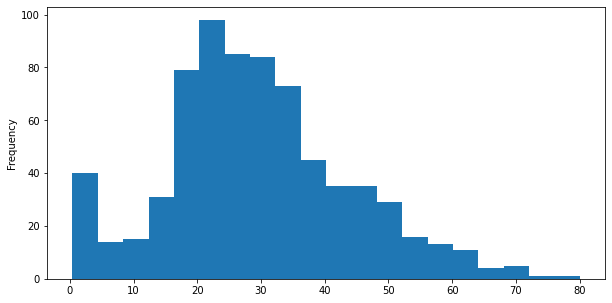

In [8]:
df.Age.plot.hist(bins=20, figsize=(10,5))
plt.show()

This shows most of the passengers were in early 30s. Therefore we can assume that the missing values have a similar age.

In [9]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Although the cabin column shows the seat information of the passengers and does not seem to have a correlation with the survived passengers. Hence dropping the Cabin column.

In [13]:
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
#Lets reserve passenger id and name for final observation
passengers = df.loc[:, ['PassengerId', 'Name']] 

In [16]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Similar to the Cabin column, the Ticket column also shows less correlation with the survived passengers. Hence dropping the Ticket column. Hence dropping this column too. 

In [19]:
df.drop('Ticket', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

There are still missing values to be filled in the Embarked column. Let us fill them with the most common value.

In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

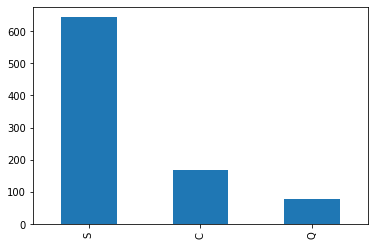

In [23]:
df.Embarked.value_counts().plot(kind='bar')

In [24]:
#There are S values more than Q values, so lets fill the missing values with S
df.Embarked.fillna('S', inplace=True)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

SibSp and Parch are the number of siblings/spouse and parents/children on board. Hence it is fair enough to combine them into a single column and then drop them.

In [26]:
df['family_count'] = df.SibSp + df.Parch + 1

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_count
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [28]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   family_count  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


***EDA***
- Let us explore the cleaned data further.

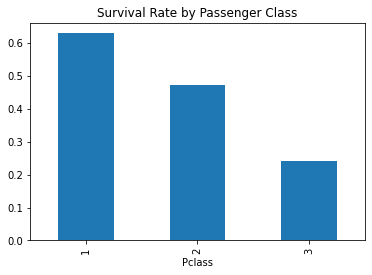

In [30]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.show()

This shows more passengers travelled in first class were survived than other classes

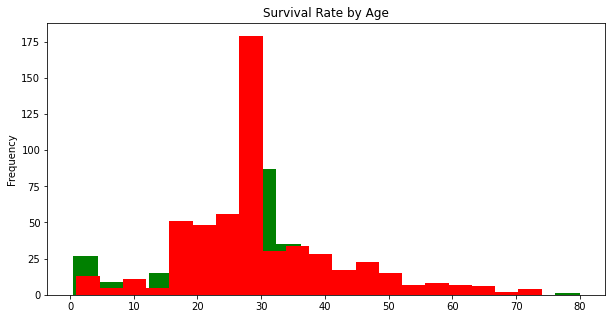

In [31]:
df['Age'][df.Survived == 1].plot.hist(bins=20, figsize=(10,5), color='green')
df['Age'][df.Survived == 0].plot.hist(bins=20, figsize=(10,5), color='red')
plt.title('Survival Rate by Age')
plt.show()

This shows more middle aged passengers (in 25-30) did not survive

In [32]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [33]:
import warnings
warnings.filterwarnings('ignore')

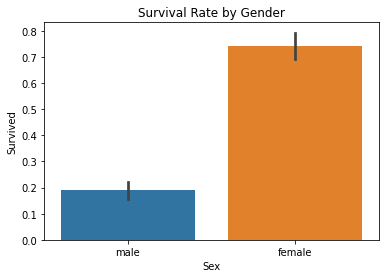

In [34]:
sns.barplot(df.Sex, df.Survived)
plt.title('Survival Rate by Gender')
plt.show()

This shows more female passengers survived than male

In [35]:
df.groupby('family_count').Survived.mean()

family_count
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

This shows the rate of survived passengers who were single / without their families are more.

***Update datatypes***

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   family_count  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Sex and Embarked columns are in Object datatype. Let us create dummies to one hot encode each value in respective columns. Let us also rename Sex column to Gender

In [37]:
df.rename(columns={'Sex': 'Gender'}, inplace=True)

In [38]:
df.head()

,Survived,Pclass,Gender,Age,Fare,Embarked,family_count
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [39]:
pd.get_dummies(df, columns=['Gender', 'Embarked'], drop_first=True)

,Survived,Pclass,Age,Fare,family_count,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,2,1,0,1
1,1,1,38.000000,71.2833,2,0,0,0
2,1,3,26.000000,7.9250,1,0,0,1
3,1,1,35.000000,53.1000,2,0,0,1
4,0,3,35.000000,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,1,0,1
887,1,1,19.000000,30.0000,1,0,0,1
888,0,3,29.699118,23.4500,4,0,0,1
889,1,1,26.000000,30.0000,1,1,0,0


In [40]:
df.shape

(891, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Gender        891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   family_count  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [42]:
df.drop(columns=['Gender', 'Embarked'], axis=1, inplace=True)

In [43]:
df.shape

(891, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   Fare          891 non-null    float64
 4   family_count  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


***Split the data***

In [45]:
X = df.drop(columns='Survived', axis=1)
y = df['Survived']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Build the model***

In [47]:
#Lets build and evaluate the base model with decision tree algorithm
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_model_pred = base_model.predict(X_test)
accuracy_score(y_test, base_model_pred)

0.659217877094972

In [48]:
#Let us try hyperparameter tuning for the decision tree algorithm
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None], 
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10, 20, 50, 100]}

In [49]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='accuracy', cv=5)

In [50]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_split': [2, 5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [51]:
print(gsc.best_params_)
print(gsc.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5, 'splitter': 'random'}
0.7205161036146952


In [52]:
#Now that we have got best parameters. Let us build the model with best parameters and evaluate it.
dtc = DecisionTreeClassifier(criterion=gsc.best_params_['criterion'],
                             max_depth=gsc.best_params_['max_depth'],
                             min_samples_split=gsc.best_params_['min_samples_split'],
                             splitter=gsc.best_params_['splitter'])

In [53]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5,
                       splitter='random')

**Evaluate**

In [54]:
pred = dtc.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Classification Report: \n', classification_report(y_test, pred))

Accuracy Score:  0.7206703910614525
Confusion Matrix: 
 [[88 17]
 [33 41]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       105
           1       0.71      0.55      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.72      0.72      0.71       179



### Inference
 - The accuracy and the classification report is fairly a decent scores for the given dataset using Desion Tree Algorithm. As this is for a study, we may consider this approach. The prediction is for an unrealistic study and so the duplicates were not removed for building the model. Removal of duplicates gives a better result. Hence we can use this model for further analysis.

In [55]:
y_test.shape

(179,)

In [56]:
X_test.head()

,Pclass,Age,Fare,family_count
709,3,29.699118,15.2458,3
439,2,31.000000,10.5000,1
840,3,20.000000,7.9250,1
720,2,6.000000,33.0000,2
39,3,14.000000,11.2417,2


In [57]:
X_test.shape

(179, 4)

In [58]:
#Lets create a dataframe with the results
results = X_test.join(passengers, on=X_test.index)

In [59]:
results.head()

,Pclass,Age,Fare,family_count,PassengerId,Name
709,3,29.699118,15.2458,3,710,"Moubarek, Master. Halim Gonios (""William George"")"
439,2,31.000000,10.5000,1,440,"Kvillner, Mr. Johan Henrik Johannesson"
840,3,20.000000,7.9250,1,841,"Alhomaki, Mr. Ilmari Rudolf"
720,2,6.000000,33.0000,2,721,"Harper, Miss. Annie Jessie ""Nina"""
39,3,14.000000,11.2417,2,40,"Nicola-Yarred, Miss. Jamila"


In [60]:
results.shape

(179, 6)

In [61]:
results['Survived'] = pred

In [62]:
results.reset_index(drop=True, inplace=True)

In [63]:
results.head()

,Pclass,Age,Fare,family_count,PassengerId,Name,Survived
0,3,29.699118,15.2458,3,710,"Moubarek, Master. Halim Gonios (""William George"")",0
1,2,31.000000,10.5000,1,440,"Kvillner, Mr. Johan Henrik Johannesson",0
2,3,20.000000,7.9250,1,841,"Alhomaki, Mr. Ilmari Rudolf",0
3,2,6.000000,33.0000,2,721,"Harper, Miss. Annie Jessie ""Nina""",1
4,3,14.000000,11.2417,2,40,"Nicola-Yarred, Miss. Jamila",0


In [64]:
#Saving the results with predicted result to a csv file. As the model is not expected to further predict anymore data, we dont have to save it.
import pickle
pickle.dump(results, open('results.pkl', 'wb'))